In [7]:
#import necessary libraries 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [8]:
#Load the Dataset
dataset=pd.read_csv("C:/Users/Fadilah Thasnim/Desktop/Academics/6 - Semester/3. ML/Lab/health care diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

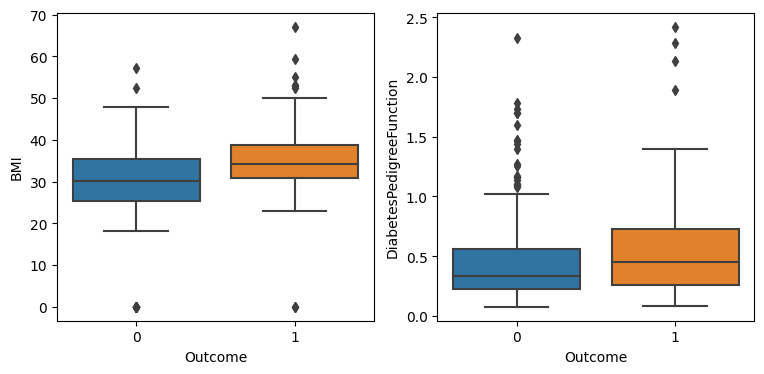

In [12]:
plt.figure(figsize=(9, 4))  # to set the figure size
# boxplot btw outcome and BMI
plt.subplot(121)
sns.boxplot(x='Outcome', y='BMI', data=dataset)
#boxplot between Outcome and DiabetesPedigreeFunction
plt.subplot(122)
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=dataset)

# we can infer that both cases there is not much differences in them and Outcome 

C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_28344\939216662.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset.BMI, dataset.DiabetesPedigreeFunction,cmap = 'jet', alpha = 0.3)


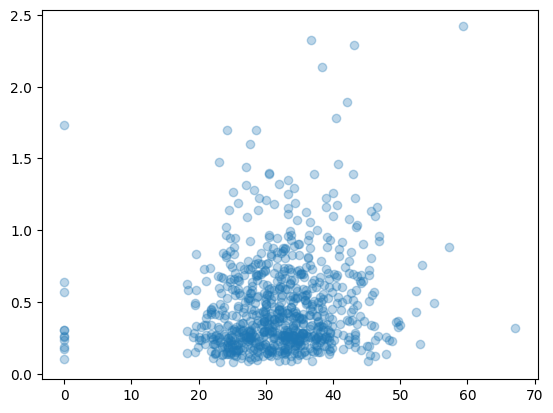

In [19]:
colors=pd.get_dummies(dataset.Outcome, drop_first=True)
plt.scatter(dataset.BMI, dataset.DiabetesPedigreeFunction,cmap = 'jet', alpha = 0.3)

# here we can seee that in y axis BMI gives us bigger boundary 

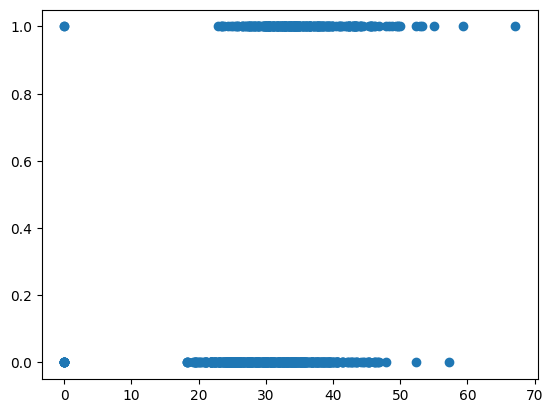

In [24]:

plt.plot(dataset.BMI,colors,'o')

In [35]:
#Logistic Regression 

X= dataset.BMI.values.reshape(-1,1)
y= colors
clf = LogisticRegression() 
clf.fit(X,y)
predict=clf.predict(X)

C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
X = dataset.BMI.values.reshape(-1, 1)
y = colors

# Reshape y using ravel() to convert it to a 1D array
y = np.ravel(y)

clf = LogisticRegression() 
clf.fit(X, y)
predict = clf.predict(X)

In [42]:
clf.intercept_ # the intercept

array([-3.68596089])

In [71]:
clf.coef_ # the coefficient

array([[0.09351691]])

In [43]:
def lg(x): return 1/(1 + np.exp(clf.intercept_clf.coef_*x))

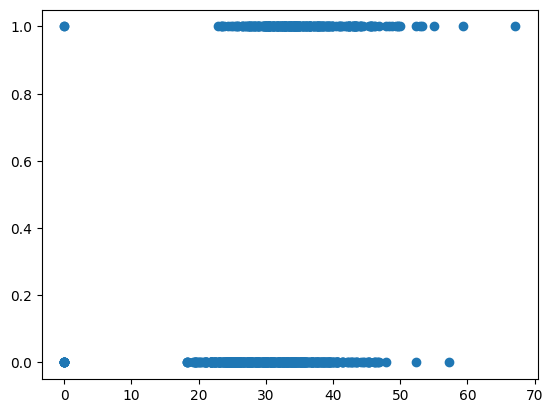

In [44]:
x=dataset.BMI.values.reshape(-1,1) 
plt.plot(dataset.BMI, colors,'o')

In [68]:
# Reshape the input value to be a 2D array
input_value = np.array([35]).reshape(1, -1)
# Now, you can use the predict() method with the reshaped input data
clf.predict(input_value)

array([0], dtype=uint8)

In [69]:
#shows the likelyhood of the model to show the person with so and so BMI will have diabeties
clf.predict_proba(input_value)

array([[0.6017756, 0.3982244]])

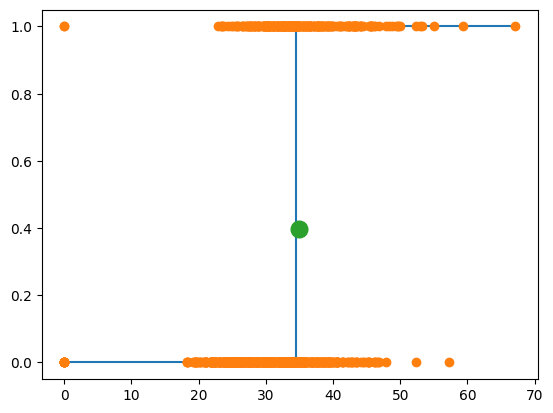

In [70]:
# Plotting sorted BMI and corresponding y values
plt.plot(np.sort(dataset.BMI ), np.sort(y))  
# Plotting BMI against colors with markers
plt.plot(dataset.BMI , colors, 'o')
# Assuming you want to plot the probability of class 1 for a BMI value of 1500
# You should use clf.predict_proba() correctly
# It should be something like this if you want the probability of class 1
probability_class_1 = clf.predict_proba(np.array([[35]]))[:, 1]
plt.plot(35, probability_class_1, 'o', markersize=12)

from the above graph we can say for a person with BMI of 35 may not be prone to diabeties as it falls in class 2 